### Load Required Packages

In [61]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import metrics
import matplotlib.pyplot as plt
import random
import numpy as np
import os
import tensorflow as tf
import seaborn as sns
from keras.preprocessing import image
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd

### Helper Functions

In [41]:
# Función para predecir una imagen con diferentes preprocesamientos según el modelo
def predict_image(img_path, inference_func, to_grayscale=False):
    img = image.load_img(img_path, target_size=(224, 224))  # Normalización de los píxeles de la foto
    img_array = image.img_to_array(img)
    if to_grayscale:
        img_array = tf.image.rgb_to_grayscale(img_array)  # Convertir a escala de grises si es necesario
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.0  # Asegurarse de que sea de tipo float y normalizar
    output = inference_func(tf.constant(img_array))
    prediction_value = output["output_0"].numpy()[0][0]  # Obtención del resultado de la función de inferencia
    return prediction_value

In [35]:
# Función para obtener las predicciones y etiquetas verdaderas
def get_predictions_and_labels(model, real_images, fake_images, num_images, to_grayscale=False):
    true_labels = []
    predictions = []

    # Obtener una muestra aleatoria de imágenes de cada conjunto de datos
    selected_real_images = random.sample(real_images, min(num_images, len(real_images)))
    selected_fake_images = random.sample(fake_images, min(num_images, len(fake_images)))

    # Procesar las imágenes reales seleccionadas
    for img_path in selected_real_images:
        true_labels.append(1)  # Etiqueta 1 para imágenes reales
        prediction_value = predict_image(img_path, model, to_grayscale)
        predictions.append(prediction_value)

    # Procesar las imágenes falsas seleccionadas
    for img_path in selected_fake_images:
        true_labels.append(0)  # Etiqueta 0 para imágenes falsas
        prediction_value = predict_image(img_path, model, to_grayscale)
        predictions.append(prediction_value)

    return true_labels, predictions

# Load our Models densenet

## Densenet Reg

In [12]:
#Cargamos el modelo y obtenemos la funcion de inferencia
model_dir = 'models/densent-arch'
model = tf.saved_model.load(model_dir)
inference_func_dr = model.signatures["serving_default"]
print(inference_func_dr)

ConcreteFunction Input Parameters:
  inputs (KEYWORD_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
Output Type:
  Dict[['output_0', TensorSpec(shape=(None, 1), dtype=tf.float32, name='output_0')]]
Captures:
  2189090943600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189092868112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189092867936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189090943424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189090943248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189092867056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189092866880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189090943072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189090942896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189090942720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189092866704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  21890928665

## Densenet Augm

In [13]:
#Cargamos el modelo y obtenemos la funcion de inferencia
model_dir = 'models/densent-augm'
model = tf.saved_model.load(model_dir)
inference_func_da = model.signatures["serving_default"]
print(inference_func_da)

ConcreteFunction Input Parameters:
  inputs (KEYWORD_ONLY): TensorSpec(shape=(None, 224, 224, 1), dtype=tf.float32, name='inputs')
Output Type:
  Dict[['output_0', TensorSpec(shape=(None, 1), dtype=tf.float32, name='output_0')]]
Captures:
  2190017272416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189305433952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189305433776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2190017272240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2190017272064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189305432896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189305432720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2190017271888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2190017271712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2190017271536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189305432544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  21893054323

## Densenet Grey

In [14]:
#Cargamos el modelo y obtenemos la funcion de inferencia
model_dir = 'models/densent-grey'
model = tf.saved_model.load(model_dir)
inference_func_dg = model.signatures["serving_default"]
print(inference_func_dg)

ConcreteFunction Input Parameters:
  inputs (KEYWORD_ONLY): TensorSpec(shape=(None, 224, 224, 1), dtype=tf.float32, name='inputs')
Output Type:
  Dict[['output_0', TensorSpec(shape=(None, 1), dtype=tf.float32, name='output_0')]]
Captures:
  2190437760720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189674198144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189674197968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2190437760544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2190437760368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189674197088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189674196912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2190437760192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2190437760016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2190437759840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189674196736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  21896741965

## Picker Images

In [93]:
#Ruta de nuestro dataset
base_path = 'dataset/real-vs-fake/'
real_path = 'dataset/real-vs-fake/test/real'
fake_path = 'dataset/real-vs-fake/test/fake'

#Conjuntos de Imagenes
real_images = [os.path.join(real_path, img) for img in os.listdir(real_path)]
fake_images = [os.path.join(fake_path, img) for img in os.listdir(fake_path)]

true_labels = []
predictions = []
num_images = 3000

# Obtener una muestra aleatoria de imágenes de cada conjunto de datos
selected_real_images = random.sample(real_images, min(num_images, len(real_images)))
selected_fake_images = random.sample(fake_images, min(num_images, len(fake_images)))

images_df = pd.DataFrame(selected_real_images)
images_df

,0
0,dataset/real-vs-fake/test/real\54743.jpg
1,dataset/real-vs-fake/test/real\62694.jpg
2,dataset/real-vs-fake/test/real\62988.jpg
3,dataset/real-vs-fake/test/real\67087.jpg
4,dataset/real-vs-fake/test/real\58975.jpg
...,...
2495,dataset/real-vs-fake/test/real\69113.jpg
2496,dataset/real-vs-fake/test/real\60454.jpg
2497,dataset/real-vs-fake/test/real\59771.jpg
2498,dataset/real-vs-fake/test/real\66480.jpg


# Predictions and Labels

In [52]:
#Obtencion de las predicciones con nuestros tres modelos
true_labels1, predictions1 = get_predictions_and_labels(inference_func_dr, real_images, fake_images, num_images)
true_labels2, predictions2 = get_predictions_and_labels(inference_func_da, real_images, fake_images, num_images, to_grayscale=True)
true_labels3, predictions3 = get_predictions_and_labels(inference_func_dg, real_images, fake_images, num_images, to_grayscale=True)

## Detailed ROC, Precision-Recall, and Performance Metrics for the Three Models

## ROC and AUC curve

In [53]:
# Calcular las curvas ROC y el AUC para cada modelo
fpr1, tpr1, _ = roc_curve(true_labels1, predictions1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(true_labels2, predictions2)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(true_labels3, predictions3)
roc_auc3 = auc(fpr3, tpr3)

In [54]:
results = {
    'Model': ['Densenet Reg', 'Densenet Aug', 'Densenet Gr'],
    'AUC': [roc_auc1, roc_auc2, roc_auc3]
}
df_results = pd.DataFrame(results)
print(df_results)

          Model       AUC
0  Densenet Reg  0.988598
1  Densenet Aug  0.976306
2   Densenet Gr  0.976306


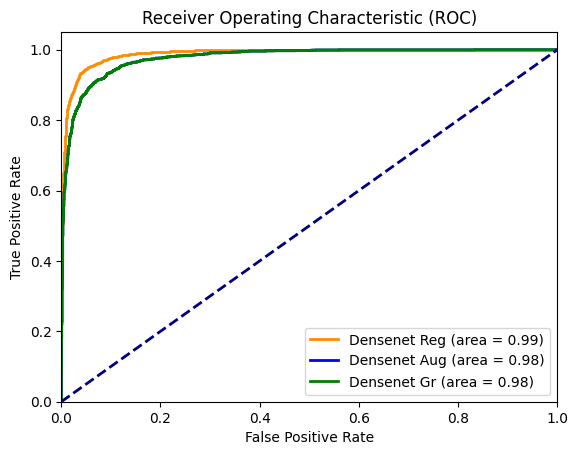

In [55]:
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='Densenet Reg (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='blue', lw=2, label='Densenet Aug (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='green', lw=2, label='Densenet Gr (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Precision Recall

In [57]:
# Calcular las curvas de Precisión-Recall y la AUC para cada modelo
precision1, recall1, _ = precision_recall_curve(true_labels1, predictions1)
pr_auc1 = auc(recall1, precision1)

precision2, recall2, _ = precision_recall_curve(true_labels2, predictions2)
pr_auc2 = auc(recall2, precision2)

precision3, recall3, _ = precision_recall_curve(true_labels3, predictions3)
pr_auc3 = auc(recall3, precision3)

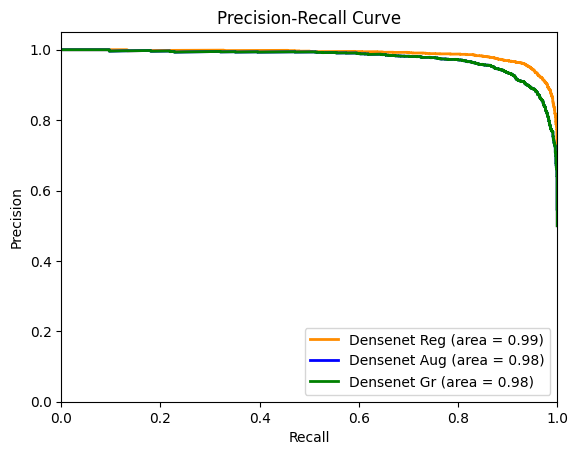

In [59]:
# Graficar las curvas de Precisión-Recall
plt.figure()
plt.plot(recall1, precision1, color='darkorange', lw=2, label='Densenet Reg (area = %0.2f)' % pr_auc1)
plt.plot(recall2, precision2, color='blue', lw=2, label='Densenet Aug (area = %0.2f)' % pr_auc2)
plt.plot(recall3, precision3, color='green', lw=2, label='Densenet Gr (area = %0.2f)' % pr_auc3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix

In [63]:
# Generar y mostrar matrices de confusión
def plot_confusion_matrix(true_labels, predictions, title):
    cm = confusion_matrix(true_labels, np.round(predictions))
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

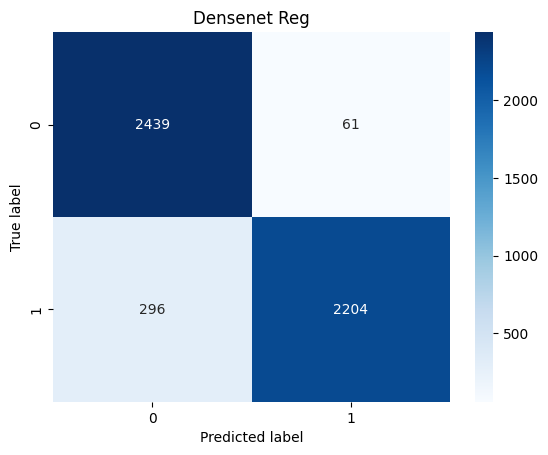

In [81]:
plot_confusion_matrix(true_labels1, predictions1, 'Densenet Reg')

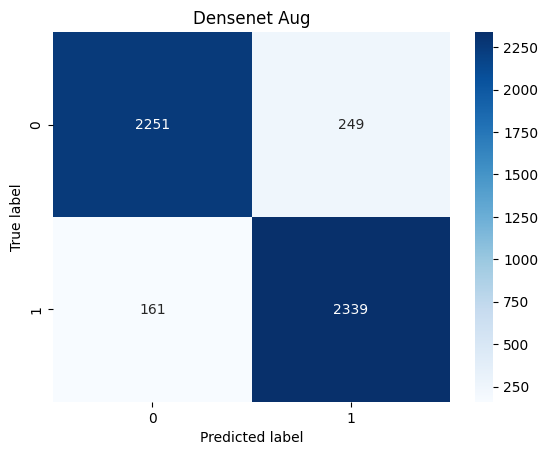

In [82]:
plot_confusion_matrix(true_labels2, predictions2, 'Densenet Aug')

# Classification Report

In [73]:
# Generar y mostrar reportes de clasificación
print("Classification Report Dens Reg:")
print(classification_report(true_labels1, np.round(predictions1)))

Classification Report Dens Reg:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2500
           1       0.97      0.88      0.93      2500

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000



In [74]:
print("Classification Report Dens Aug:")
print(classification_report(true_labels2, np.round(predictions2)))

Classification Report Dens Aug:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      2500
           1       0.90      0.94      0.92      2500

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



In [75]:
print("Classification Report Dens Grey:")
print(classification_report(true_labels3, np.round(predictions3)))

Classification Report Dens Grey:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      2500
           1       0.90      0.94      0.92      2500

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



# Distribution Prediction

In [76]:
def plot_prediction_distribution(predictions, true_labels, title):
    plt.figure()
    sns.histplot(predictions, bins=50, kde=True, color='blue', label='Predictions')
    sns.histplot([pred for pred, label in zip(predictions, true_labels) if label == 1], bins=50, kde=True, color='green', label='Real Images')
    sns.histplot([pred for pred, label in zip(predictions, true_labels) if label == 0], bins=50, kde=True, color='red', label='Fake Images')
    plt.title(title)
    plt.legend()
    plt.show()


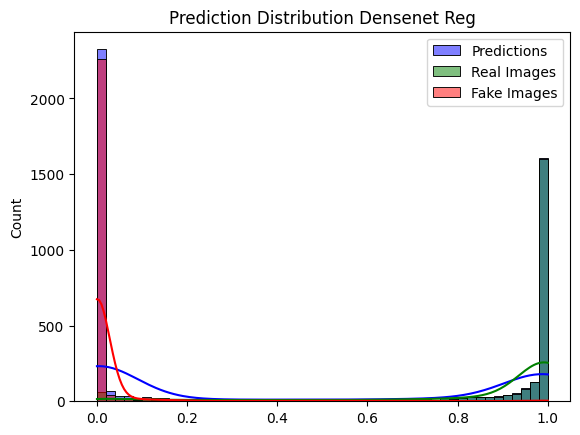

In [78]:
plot_prediction_distribution(predictions1, true_labels1, 'Prediction Distribution Densenet Reg')

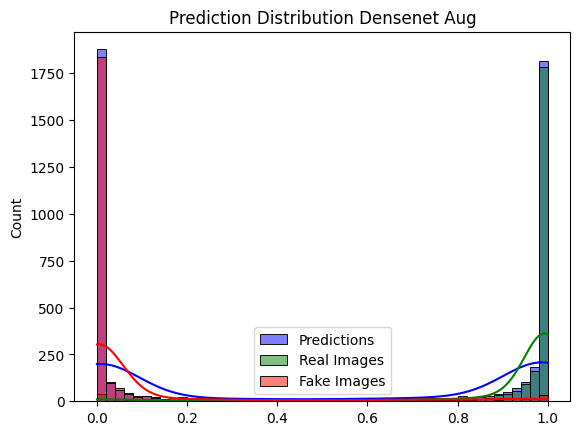

In [79]:
plot_prediction_distribution(predictions2, true_labels2, 'Prediction Distribution Densenet Aug')

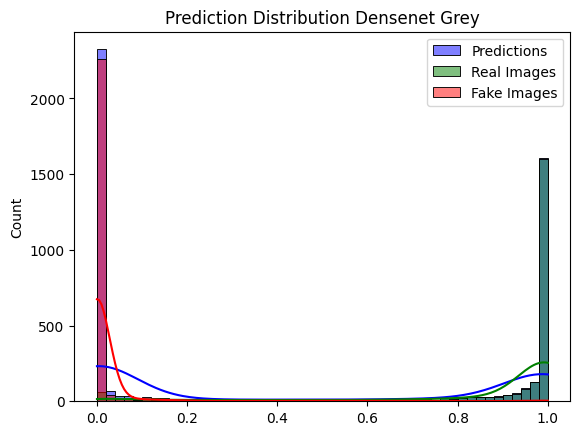

In [80]:
plot_prediction_distribution(predictions1, true_labels1, 'Prediction Distribution Densenet Grey')

# Scatter Plot

In [86]:
def plot_scatter_predictions(predictions, true_labels, title):
    plt.figure()
    plt.scatter(range(len(predictions)), predictions, c=true_labels, cmap='coolwarm', alpha=0.6, edgecolors='w', s=60)
    plt.colorbar(label='True Labels')
    plt.xlabel('Sample Index')
    plt.ylabel('Prediction')
    plt.title(title)
    plt.show()

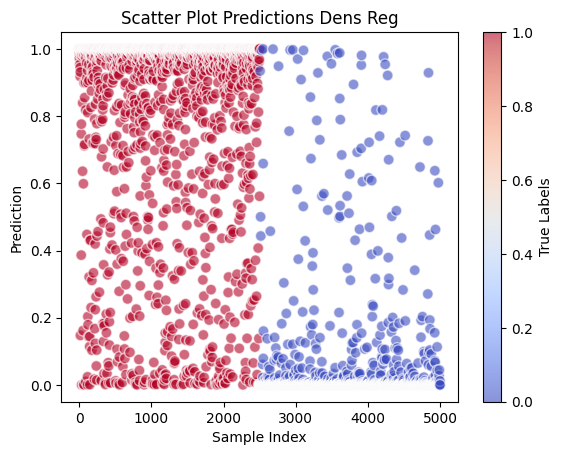

In [88]:
plot_scatter_predictions(predictions1, true_labels1, 'Scatter Plot Predictions Dens Reg')

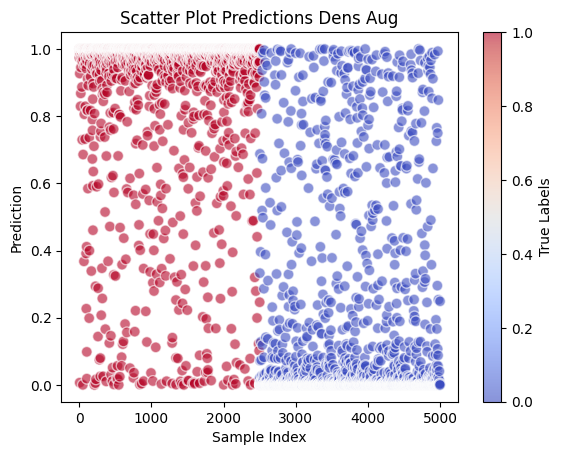

In [89]:
plot_scatter_predictions(predictions2, true_labels2, 'Scatter Plot Predictions Dens Aug')

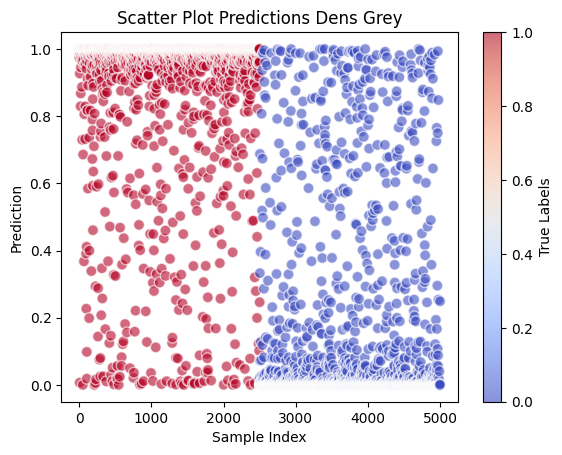

In [90]:
plot_scatter_predictions(predictions2, true_labels2, 'Scatter Plot Predictions Dens Grey')